In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from operator import itemgetter 
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy

In [2]:
database = pd.read_csv('Electronics.csv')
database.head(10)

# Reading the data from csv File

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [3]:
database = pd.read_csv('Electronics.csv', names = ['UserId', 'ProductId','Rating','Timestamp'])
database.head(10)

# Here we provide appropriate column names to the dataframe, to make it easier to understand as we proceed.

,UserId,ProductId,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [4]:
database.info()

# A rough summary of the database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
UserId       object
ProductId    object
Rating       float64
Timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [5]:
database.shape

# Number of rows & columns. There are 7824482 rows, we will try to minimize this later on.

(7824482, 4)

In [6]:
database.dtypes

# datatypes available to us

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

In [7]:
print(database.isnull().values.any())
print(database.isnull().sum())

# As expected no missing values in the database

False
UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64


In [8]:
db = database.drop(['Timestamp'], axis = 1)
db.head(10)

# Let us drop the time stamp column as it isnt pertinent to what we are trying to do.

,UserId,ProductId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
5,A1QGNMC6O1VW39,0511189877,5.0
6,A3J3BRHTDRFJ2G,0511189877,2.0
7,A2TY0BTJOTENPG,0511189877,5.0
8,A34ATBPOK6HCHY,0511189877,5.0
9,A89DO69P0XZ27,0511189877,5.0


In [9]:
db.describe()

# a brief mathematical summary of the ratings column shows us there are no missing values or outliers to deal with..

,Rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


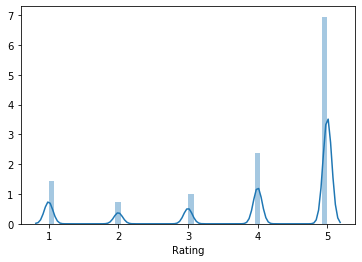

In [10]:
sns.distplot(db['Rating'])

# Frequency Distribution of the ratings shows a significant number of ratings are on the higher side, primarily 5.0. We can
# view this more clearly in the countplot below.

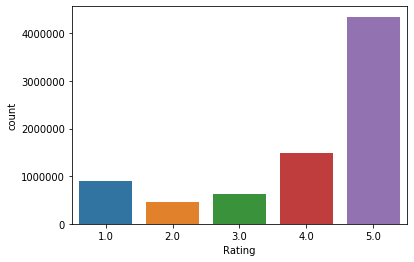

In [11]:
sns.countplot(database['Rating'])

# As we saw above, a significant number of ratings are given as 5, while 2 is the least.

In [12]:
db.nunique()

# Here we determine the number of unique rows in each column, i.e number of users and products available to us in the
# database.

UserId       4201696
ProductId     476002
Rating             5
dtype: int64

In [13]:
Users = db.UserId.unique() 
Products = db.ProductId.unique()

# Listing out the id's of said unique Users and Products.

In [14]:
User_Counts = db['UserId'].value_counts()
Product_Counts = db['ProductId'].value_counts()

# Here we list out the number of products each user has given a rating to, and the number ratings each produt has recived.
# This is very useful, as it allows to remove users who have rated very few products or remove products which have been 
# barely rated. The action taken depends on the type of recommendation system we want to design.

In [15]:
User_Sorted_db = db.groupby('UserId')
database = User_Sorted_db.filter(lambda x: len(x) > 50)

# Here we remove all users from the database that have rated fewer than 50 products/items.

In [16]:
Product_Sorted_db = db.groupby('ProductId')
alt_database = Product_Sorted_db.filter(lambda x: len(x) > 50)

# Here we remove all products that have recived less than 50 ratings. Primarily we will be using the previous database. But
# this is an alternate option when designing content based recomendation systems. This alternate database is preferred when
# we design popularity recommendation system.

In [17]:
database.shape

# After removing the infrequent users, the size of our new database has significantly reduced.

(122171, 3)

In [18]:
database.nunique()

# We now have 1466 unique users who have rated a total of 47155 products.

UserId        1466
ProductId    47155
Rating           5
dtype: int64

In [19]:
#Popularity Based Model
# Train, Test = train_test_split(database, test_size=.25)

# For Popularity based model we offer the same recommendation to every user. Hence there is no reliable performance metric
# and thus we wont bother splitting the data.

In [20]:
Popular_Products = database.groupby('ProductId')['Rating'].mean().sort_values(ascending=False)
Popular_Products.head(10)


# In Popularity recommender system, we determine the most popular products based on their average rating and recommend 
# the more popular ones to the users. It is not user specific.
# A point to be noted here is that some of products with high ratings have been rated very few times, so this gives us a 
# distorted output. To fix this we should only consider products that have been rated n number of times. Since we already
# created a database erlier (alt_database) that takes care of this problem by filtering out products rated less than 50 
# times, we can directly use this modified database to get the desired result. This has been done below.

ProductId
B00LKG1MC8    5.0
B000H8WLKC    5.0
B000HA4EZK    5.0
B004EHZZDW    5.0
B004EI0EG4    5.0
B000H9J3WA    5.0
B004EK9ODG    5.0
B004EKEBNY    5.0
B004EKEF0S    5.0
B004EKOCSS    5.0
Name: Rating, dtype: float64

In [21]:
Popular_Products = alt_database.groupby('ProductId')['Rating'].mean().sort_values(ascending=False)

# Here we get better results as we have adressed the issues discussed above.

In [22]:
#Collaborative Filtering Model
reader = Reader(rating_scale=(1.0, 5.0))

In [23]:
data = Dataset.load_from_df(database[['UserId', 'ProductId','Rating']], reader)

In [24]:
from surprise.model_selection import train_test_split
Train, Test = train_test_split(data, test_size=.25)

# Splitting the data (train 75%, Test 25%)

In [25]:
users = np.unique(list( map(itemgetter(0), Test )))

# Here we are generating a unique list of all the users available to us in the test database. 
# This will be useful to us later on. 

In [26]:
Model = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
Model.fit(Train)

# Designing User-User Collaborative Filtering Model. We use KNN to get the nearest neighbours. Here we have set k as 50
# (50 nearest neighbours) and are using pearson baseline for distance measure.
# If we want to design a Item-Item Collaborative Filtering Model, just change "'user_based': False". Rest remains the same.

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [27]:
Predict = Model.test(Test)
Predict

# using our model on test data

[Prediction(uid='A3775OP5VTX5ON', iid='B004NY9UUK', r_ui=5.0, est=3.6724137931034484, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A12EVK82QUTSA6', iid='B003EIY3OO', r_ui=4.0, est=4.260007857860042, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AN81JUYW2SL24', iid='B000E65HXA', r_ui=5.0, est=4.15, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1ZXMMQPYC3Z9I', iid='B005IHAIEI', r_ui=4.0, est=3.9148936170212765, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AUITG1DJ3QUGK', iid='B0054L8N7M', r_ui=3.0, est=4.516030956329464, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A21GW4L8FO307V', iid='B00559AJNO', r_ui=4.0, est=4.260007857860042, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1GBT4UN2RW7XY', iid='B00GQDBS7O', r_ui=5.0, est=4.068493150684931, details={'actual_k': 0, 'was_impossible': False}),
 Prediction

In [28]:
print("User-based Model : Test Set")
accuracy.rmse(Predict, verbose=True)

# Here we measure the accuracy of our test data on trained model. We have RMSE as 1, which means on average there is
# a difference of one rating point between our predicted rating and actual rating. Although its not great, it is acceptable
# for now.

User-based Model : Test Set
RMSE: 1.0487


1.0487231004994997

In [29]:
Predict_df = pd.DataFrame(Predict)
Predict_df = Predict_df.drop(['details'], axis = 1)
Predict_df.head(10)

# Converting our prediction data into a dataframe for better access and droping unwanted columns

,uid,iid,r_ui,est
0,A3775OP5VTX5ON,B004NY9UUK,5.0,3.672414
1,A12EVK82QUTSA6,B003EIY3OO,4.0,4.260008
2,AN81JUYW2SL24,B000E65HXA,5.0,4.150000
3,A1ZXMMQPYC3Z9I,B005IHAIEI,4.0,3.914894
4,AUITG1DJ3QUGK,B0054L8N7M,3.0,4.516031
5,A21GW4L8FO307V,B00559AJNO,4.0,4.260008
6,A1GBT4UN2RW7XY,B00GQDBS7O,5.0,4.068493
7,A1GWG5CWLKJ7ET,B00FF8ZRR8,5.0,4.148148
8,A31ICLWQ9CSHRS,B000AO3L84,5.0,4.826667
9,A1435P5AMCPB3X,B000F9LS0W,5.0,4.260008


In [30]:
user = Predict_df.iloc[0,0]
temp = Predict_df[(Predict_df['est']>4.0)&(Predict_df['uid']==user)]
srt = temp.sort_values("est", axis = 0, ascending = False)
recommended_products = srt.iloc[0:5,1]
recommended_products
# Here we try to recommend 5 products to a user based on the model we have trained. To get a list of recommended products
# for all users, use for loop below.

2487    B000CKVOOY
4661    B001KW07HS
5328    B000CATP4A
7728    B004JXU3PG
7904    B003NVMHL8
Name: iid, dtype: object

In [31]:
#Recommendations = pd.DataFrame(np.random.rand(1466,6),columns='UserId Recomendation_1 Recomendation_2 Recomendation_3 Recomendation_4 Recomendation_5'.split())
#Recommendations = Recommendations.astype(str)
#c = 0

#for i in usr:
#    Recommendations.iloc[c,0] = i
#    temp = Predict_df[(Predict_df['est']>3.0)&(Predict_df['uid']==i)]
#    srt = temp.sort_values("est", axis = 0, ascending = False)
#    save = pd.DataFrame(srt.iloc[0:5,1])
#    for j in range (0,4):
#        tmp = save.iloc[j,0]
#        Recommendations.iloc[c,j+1] = tmp
#    c=c+1

#### Conclusion

##### From our work so far, we can see the huge advantage offered by Collaborative Filtering over Popularity Models. The former gives personalized recommendations to each user and hence is a much closer match to the users prefrences compared to the latter. As a result it leads to increased sales, but it must be noted that for user based modeling we require a suitable database to begin with. We need considerable amount of data from which to build out model. This is not always feasible. Even with data certain users may not have a similar neighbour, or in case of a new user we have no refrence point. In such cases Popularity models come to the fore as they do not require user data and hence can begin with a cold start. Content Based or Item-Item Collaborative filtering generally performs better than popularity models but not as well as user-user collaborative filtering. Both are incapable of a cold start.

##### From all this we can draw the conclusion that hybrid models (mixture of multiple models) are our best bet for recommendation systems.